# Обработка данных, полученных с программы
## 1000000x3000 (последние 300)

In [5]:
# Импротируем необходимые функции
import numpy as np # работа с массивами и линейной алгеброй
import matplotlib.pyplot as plt # для отрисовки графиков
import pandas as pd # для чтения и работы с данными
from scipy.optimize import curve_fit # фитирующая процедура

In [6]:
def psi_f(x):
    return np.exp(-x**2/2)/np.sqrt(np.sqrt(np.pi))

def integrate_hist(hist, bin_edges):
    integral = 0
    for i in range(len(hist)):
        integral += hist[i]*(bin_edges[i+1] - bin_edges[i])
    return integral

def distr(df):
    pedestrians, bin_edges = np.histogram(df, bins = 1000)
    #print bin_edges
    
    width = bin_edges[1] - bin_edges[0]
    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], pedestrians, width = width)
    plt.xlabel('Ось x'.decode('utf-8'))
    plt.ylabel('Количество пешеходов (N)'.decode('utf-8'))
    plt.title('Распределение пешеходов по оси'.decode('utf-8'))
    plt.legend()
    plt.show()
    
    pedestrians_sq = pedestrians*pedestrians
    norm = integrate_hist(pedestrians_sq, bin_edges)
    psi_sq = pedestrians_sq/norm
    psi = pedestrians/np.sqrt(norm)

    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], psi, width = width)
    plt.xlabel('x'.decode('utf-8'))
    plt.ylabel('$\psi(x)$'.decode('utf-8'))
    plt.title(''.decode('utf-8'))
    ###
    x = np.arange(-4, 4, 0.1)
    plt.plot(x, psi_f(x), color = 'black', label = '$\psi(x)$, теоретическая'.decode('utf-8'))
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], psi_sq, width = width)
    plt.xlabel('x'.decode('utf-8'))
    plt.ylabel('$\psi^2(x)$'.decode('utf-8'))
    plt.title('Плотность вероятности'.decode('utf-8'))
    plt.plot(x, psi_f(x)**2, color = 'black', label = '$\psi^2(x)$, теоретическая'.decode('utf-8'))
    plt.legend()
    plt.show()
    
    return psi, bin_edges

In [ ]:
frame = pd.read_csv('..\data_output\output(1000000x3000)_last300\output.csv')
frame.head()

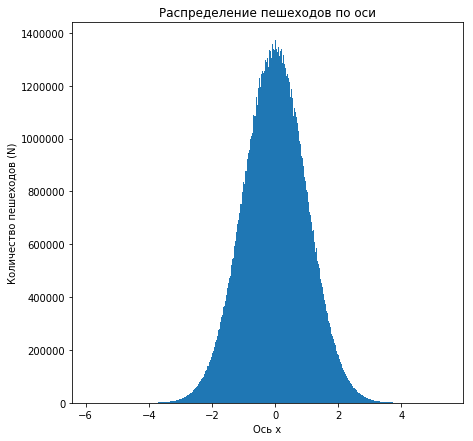

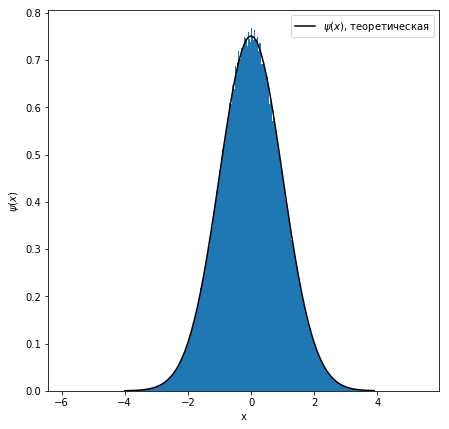

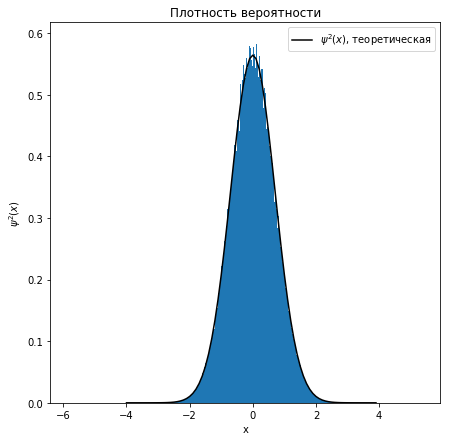

In [44]:
psi, bin_edges = distr(frame)

In [2]:
def drawNE(df):
    plt.figure(figsize=(20,7))
    plt.scatter(np.arange(df.shape[0]), df['N'], linewidths=0.1, label = 'Количество пешеходов'.decode('utf-8') )
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('Количество пешеходов (N)'.decode('utf-8'))
    plt.title('Зависимость N от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.plot(np.arange(df.shape[0]), df['E'], label = 'Данные'.decode('utf-8'))
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('E'.decode('utf-8'))
    plt.title('Зависимость энергии от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.plot(np.arange(df.shape[0]), df['E_r'], label = 'Данные'.decode('utf-8'))
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('E_r'.decode('utf-8'))
    plt.title('Зависимость опорного потенциала от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
frameNE = pd.read_csv('..\data_output\output(1000000x3000)_last300\outputNE.csv')

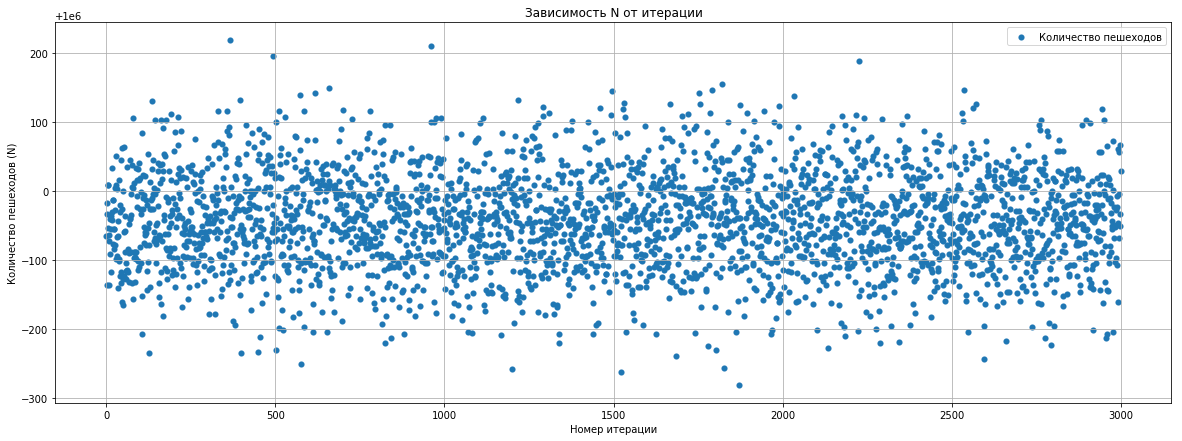

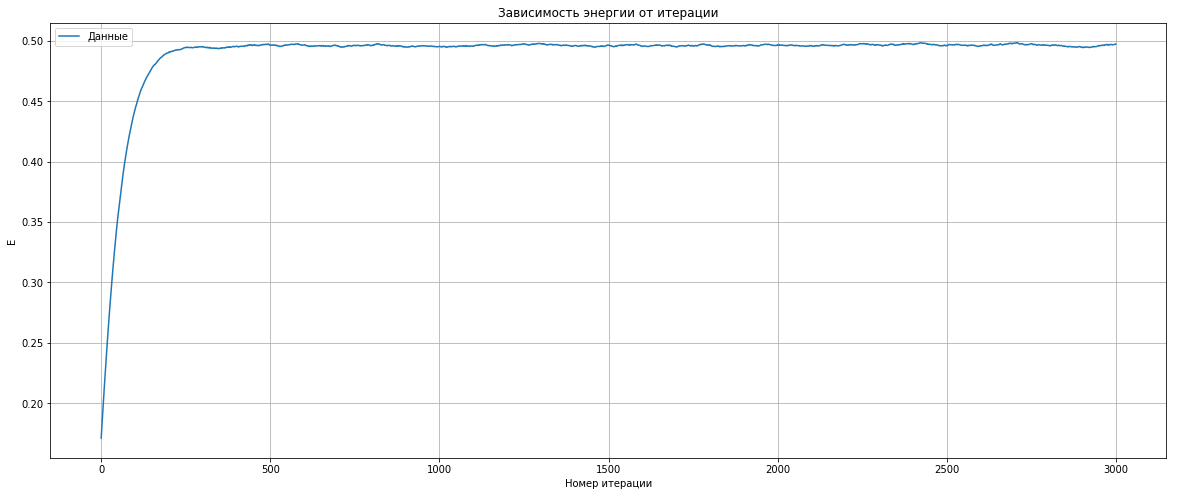

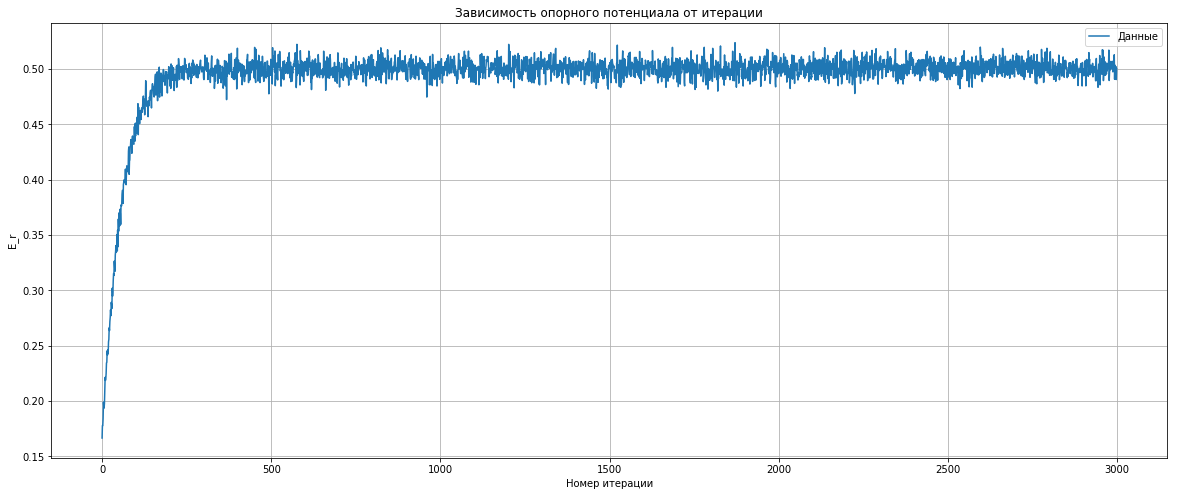

In [4]:
drawNE(frameNE)

In [6]:
E = frameNE[500:]['E_r'].mean()
s_E = np.std(frameNE[500:]['E_r'])
print E, s_E

0.5006663696 0.00696594030742


[  7.51949470e-01  -5.72191852e-06   9.97571941e-01] [ 0.00045034  0.00068993  0.00068987]


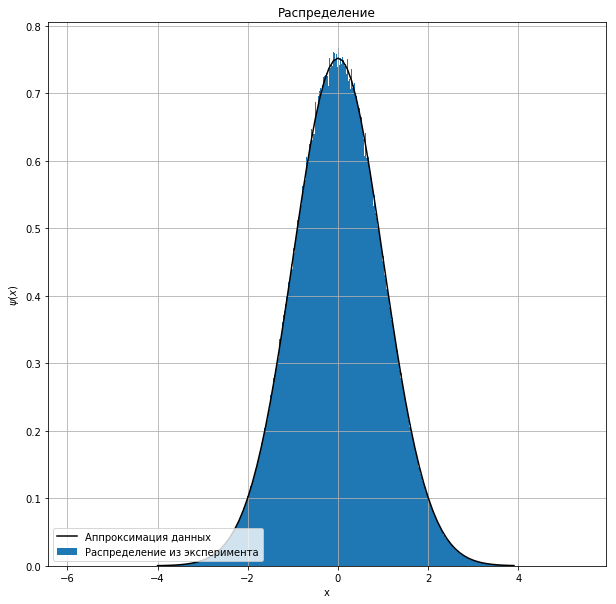

In [24]:
def gauss_function(x, a, x0, s):
    return a*np.exp(-(x-x0)**2/(2*s**2))

def find_psy(df):
    pedestrians, bin_edges = np.histogram(df, 1000) 
    norm = integrate_hist(pedestrians*pedestrians, bin_edges)
    psi = pedestrians/np.sqrt(norm)
    
    #Сделаем массив точек (x, y)
    x = [(bin_edges[i+1]+bin_edges[i])/2 for i in range(len(psi))]
    y = psi
    # Теперь фитируем
    popt, pcov = curve_fit(f = gauss_function, 
                                 xdata= x, 
                                 ydata=y, maxfev=10000)
    print popt, np.sqrt(np.diag(pcov))
    
    plt.figure(figsize=(10,10))
    plt.bar(bin_edges[:-1], psi, width = bin_edges[1]-bin_edges[0], label = 'Распределение из эксперимента'.decode('utf-8'))
    plt.plot(np.arange(-4,4,0.1), gauss_function(np.arange(-4,4,0.1), *popt), color = 'black', label = 'Аппроксимация данных'.decode('utf-8'))
    plt.title('Распределение'.decode('utf-8'))
    plt.xlabel('x')
    plt.ylabel('$\psi(x)$'.decode('utf-8'))
    plt.grid()
    plt.legend(loc = 3)
    plt.show()
    
    return popt, pcov, x, y
    

popt, pcov, x_calc, y_calc = find_psy(frame)

$$
\psi(x) = 0.7517\cdot e^{-\cfrac{(x+0.000006)^2}{2\cdot0.9976^2}},
$$
теор. зависимость:
$$
\psi(x) = \cfrac{1}{\pi^{1/4}}\cdot e^{-\cfrac{x^2}{2}}\approx0.7511\cdot e^{-\cfrac{x^2}{2}}.
$$

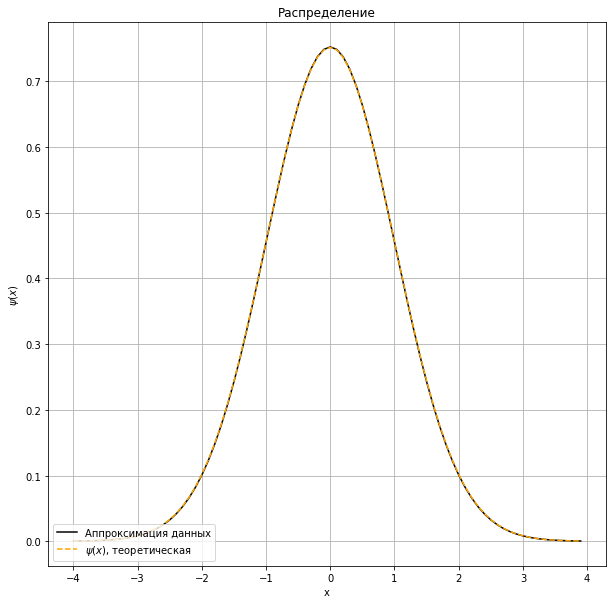

In [25]:
def two_distr_approx(popt):
    plt.figure(figsize=(10,10))
    x = np.arange(-4, 4, 0.1)
    plt.plot(np.arange(-4,4,0.1), gauss_function(np.arange(-4,4,0.1), *popt), color = 'black', label = 'Аппроксимация данных'.decode('utf-8'))
    plt.plot(x, psi_f(x), label = '$\psi(x)$, теоретическая'.decode('utf-8'), color = 'orange', linestyle='dashed')
    plt.title('Распределение'.decode('utf-8'))
    plt.xlabel('x')
    plt.ylabel('$\psi(x)$'.decode('utf-8'))
    plt.grid()
    plt.legend(loc = 3)
    plt.show()
two_distr_approx(popt)

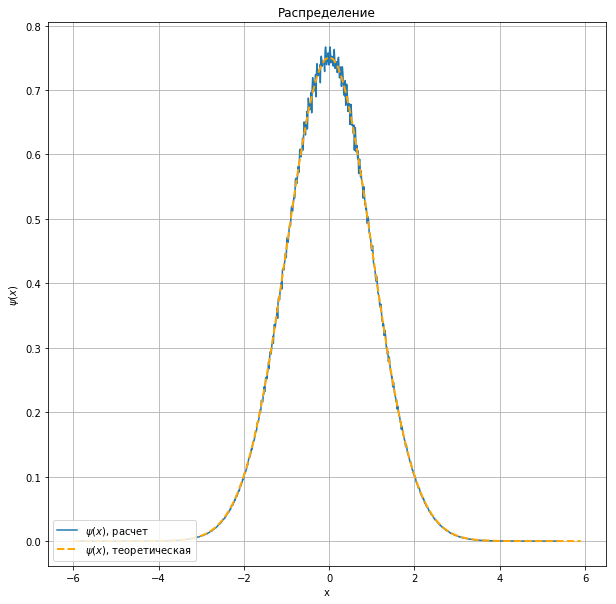

In [33]:
def two_distr_calc(x_calc, y_calc):
    plt.figure(figsize=(10,10))
    x = np.arange(-6, 6, 0.1)
    
    plt.plot(x_calc, y_calc, label = '$\psi(x)$, расчет'.decode('utf-8'))
    plt.plot(x, psi_f(x), label = '$\psi(x)$, теоретическая'.decode('utf-8'), color = 'orange', linestyle='dashed', linewidth = 2)
    plt.title('Распределение'.decode('utf-8'))
    plt.xlabel('x')
    plt.ylabel('$\psi(x)$'.decode('utf-8'))
    plt.grid()
    plt.legend(loc = 3)
    plt.show()
two_distr_calc(x_calc, y_calc)

## Посчитаем через интеграл

In [57]:
# Посчитаем энергию через интеграл
def V(x):
    return x**2/2

def calc_E(psi, bin_edges):
    int_1 = 0
    int_2 = 0
    for i in range(len(psi)):
        x_i = (bin_edges[i+1] + bin_edges[i])/2
        int_1 += V(x_i)*psi[i]*(bin_edges[i+1] - bin_edges[i])
        int_2 += psi[i]*(bin_edges[i+1] - bin_edges[i])
    return int_1/int_2
print calc_E(y_calc, bin_edges)

0.496110823238


Получили значение $E=0.496$. К тому же
$
\cfrac{\int\limits^{+\infty}_{-\infty} V(x)* 0.7517\cdot e^{-\cfrac{(x+0.000006)^2}{2\cdot0.9976^2}}dx}{\int\limits^{+\infty}_{-\infty}0.7517\cdot e^{-\cfrac{(x+0.000006)^2}{2\cdot0.9976^2}}dx} = \cfrac{0.935349}{1.87971} = 0.4976
$

In [4]:
def f_1(popt):
    plt.figure(figsize=(10,10))
    x = np.arange(-6, 6, 0.05)
    #plt.plot(np.arange(-4,4,0.1), gauss_function(np.arange(-4,4,0.1), *popt), color = 'black', label = 'Аппроксимация данных'.decode('utf-8'))
    plt.plot(x, 0.5*x**2*(psi_f(x)-gauss_function(np.arange(-6,6,0.05), *popt)), label = '$\psi(x) - approx$'.decode('utf-8'))
    plt.title('Разность распределений'.decode('utf-8'))
    plt.xlabel('x')
    plt.ylabel('$\psi(x) - approx$'.decode('utf-8'))
    plt.grid()
    plt.legend(loc = 3)
    plt.show()
f_1(popt)

NameError: name 'popt' is not defined

In [2]:
'''
def one_hist(df, num, frame_av, frameNE):
    pedestrians, bin_edges = np.histogram(df, 1000)
    pedestrians_sq = pedestrians*pedestrians
    norm = integrate_hist(pedestrians_sq, bin_edges)
    psi_sq = pedestrians_sq/norm
    psi = pedestrians/np.sqrt(norm)
    
    x = np.arange(-4, 4, 0.1)

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10), dpi = 200)
    ax[0][0].bar(bin_edges[:-1], psi_sq, width = bin_edges[1]-bin_edges[0])
    ax[0][0].set_xlabel('x'.decode('utf-8'))
    ax[0][0].set_ylabel('$\psi^2(x)$'.decode('utf-8'))
    ax[0][0].set_title('Плотность вероятности'.decode('utf-8'))
    ax[0][0].plot(x, psi_f(x)**2, color = 'black', label = '$\psi^2(x)$, теоретическая'.decode('utf-8'))
    ax[0][0].set_title('Усреднение по итерациям'.decode('utf-8') + "[" + str((num-1)*frame_av + 1).decode('utf-8') + ":" + str((num)*frame_av).decode('utf-8') + "]")
    ax[0][0].legend()
    ax[0][0].set_ylim(0,1)
    ax[0][0].set_xlim(-4,4)
    
    ax[1][0].bar(bin_edges[:-1], psi, width = bin_edges[1]-bin_edges[0])
    ax[1][0].set_xlabel('x'.decode('utf-8'))
    ax[1][0].set_ylabel('$\psi(x)$'.decode('utf-8'))
    ax[1][0].set_title('Плотность вероятности'.decode('utf-8'))
    ax[1][0].plot(x, psi_f(x), color = 'black', label = '$\psi^2(x)$, теоретическая'.decode('utf-8'))
    ax[1][0].set_title('Усреднение по итерациям'.decode('utf-8') + "[" + str((num-1)*frame_av + 1).decode('utf-8') + ":" + str((num)*frame_av).decode('utf-8') + "]")
    ax[1][0].legend()
    ax[1][0].set_ylim(0,1)
    ax[1][0].set_xlim(-4,4)
    
    ax[0][1].plot(np.arange(frameNE[0:num*frame_av]['E'].shape[0]), frameNE[0:num*frame_av]['E'], label = 'Данные'.decode('utf-8'))
    ax[0][1].set_xlabel('Номер итерации'.decode('utf-8'))
    ax[0][1].set_ylabel('E'.decode('utf-8'))
    ax[0][1].set_title('Зависимость энергии от итерации'.decode('utf-8'))
    ax[0][1].set_xlim(0,300)
    ax[0][1].set_ylim(0,1)
    ax[0][1].legend()
    ax[0][1].grid()
    
    ax[1][1].scatter(np.arange(frameNE[0:num*frame_av]['N'].shape[0]), frameNE[0:num*frame_av]['N'], linewidths=0.1, label = 'Количество пешеходов'.decode('utf-8') )
    ax[1][1].set_xlabel('Номер итерации'.decode('utf-8'))
    ax[1][1].set_ylabel('Количество пешеходов (N)'.decode('utf-8'))
    ax[1][1].set_title('Зависимость N от итерации'.decode('utf-8'))
    ax[1][1].set_xlim(0,300)
    ax[1][1].legend()
    ax[1][1].grid()
    
    path = './gif/'+'hist'+str(num)+'.png'
    
    fig.savefig(path)
    plt.close()
    
    
frame_av = 6
right = 0
for i in range(frameNE[2700:3000]['N'].shape[0]/frame_av):
    left = right
    right += frameNE[2700:3000]['N'][i*frame_av:(i+1)*frame_av].sum()
    one_hist(frame[int(left):int(right)], i + 1, frame_av, frameNE[2700:3000])
'''

NameError: name 'frameNE' is not defined